<a href="https://colab.research.google.com/github/swjh9523/Python_Tutorial/blob/master/%EC%BD%94%EB%A1%9C%EB%82%98_%EB%8D%B0%EC%9D%B4%ED%84%B0_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import datetime as dt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


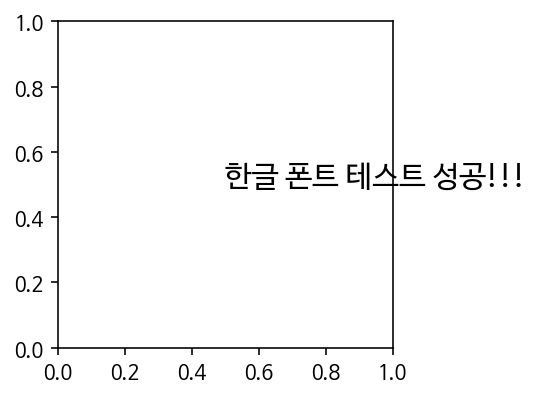

In [3]:
# 그래프 한글폰트 사용설정 in Colab
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '/content/drive/My Drive/파이썬/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## Test
plt.figure(figsize=(3,3))
plt.text(0.5, 0.5, '한글 폰트 테스트 성공!!!', size=15)
plt.show()

In [4]:
fpopl = pd.read_csv('/content/drive/MyDrive/공모전데이터파일/COVID-19/fpopl.csv')
fpopl.head()

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt
0,20200101,0,M,age_00,11650560,15
1,20200101,0,M,age_00,11590620,6
2,20200101,0,M,age_00,11560710,4
3,20200101,0,M,age_00,11470680,12
4,20200101,0,M,age_00,11350665,6


In [5]:
fpopl.columns = ["날짜","시간","성별","연령","행정동 코드","인구수"]

,날짜,시간,성별,연령,행정동 코드,인구수
0,20200101,0,M,age_00,11650560,15
1,20200101,0,M,age_00,11590620,6
2,20200101,0,M,age_00,11560710,4
3,20200101,0,M,age_00,11470680,12
4,20200101,0,M,age_00,11350665,6


In [11]:
print(fpopl["날짜"].value_counts())
print(fpopl["시간"].value_counts())
print(fpopl["성별"].value_counts())
print(fpopl["연령"].value_counts())
print(fpopl["행정동 코드"].value_counts())
print(fpopl["인구수"].value_counts())

20200606    283720
20200523    283707
20200430    283689
20200530    283667
20200613    283618
             ...  
20200131    282406
20200102    282393
20200107    282376
20200128    282370
20200106    282142
Name: 날짜, Length: 168, dtype: int64
15    1997720
16    1997660
14    1997615
17    1997536
13    1997514
18    1997250
12    1997171
19    1996564
11    1996369
20    1995647
10    1995470
0     1994764
21    1994381
9     1994263
22    1991160
8     1990102
23    1984200
7     1972142
1     1961097
6     1947853
2     1946623
3     1936615
5     1936210
4     1930517
Name: 시간, dtype: int64
F    23791453
M    23754990
Name: 성별, dtype: int64
age_25    3425704
age_30    3425702
age_20    3425698
age_35    3425685
age_55    3425684
age_50    3425681
age_45    3425665
age_40    3425657
age_60    3425654
age_70    3425450
age_65    3425237
age_15    3424390
age_10    3373382
age_00    3066854
Name: 연령, dtype: int64
11710670    112896
11710680    112888
11680650    112888
11650531    1